# Tema 16 : Ejemplos de Detección de objetos

## Montar Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importar librerias

In [2]:
from __future__ import print_function
import cv2 as cv
import matplotlib.pyplot as plt

## Descargar imagenes

In [3]:
!wget -O /content/img.jpg  https://img.buzzfeed.com/buzzfeed-static/static/2020-01/4/15/campaign_images/d24368577059/literally-just-20-famous-people-who-you-probably--2-3572-1578150407-0_dblbig.jpg
!wget -O /content/img2.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRxUW3kTNnpZu_cW8-ZK6maJOVd6QgyzwRU0w&usqp=CAU

--2020-08-22 20:14:37--  https://img.buzzfeed.com/buzzfeed-static/static/2020-01/4/15/campaign_images/d24368577059/literally-just-20-famous-people-who-you-probably--2-3572-1578150407-0_dblbig.jpg
Resolving img.buzzfeed.com (img.buzzfeed.com)... 151.101.2.114, 151.101.66.114, 151.101.130.114, ...
Connecting to img.buzzfeed.com (img.buzzfeed.com)|151.101.2.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236965 (231K) [image/jpeg]
Saving to: ‘/content/img.jpg’

/content/img.jpg    100%[===================>] 231.41K  --.-KB/s    in 0.03s   

2020-08-22 20:14:38 (8.40 MB/s) - ‘/content/img.jpg’ saved [236965/236965]

--2020-08-22 20:14:39--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRxUW3kTNnpZu_cW8-ZK6maJOVd6QgyzwRU0w
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.195.102, 74.125.195.101, 74.125.195.138, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.195.102|:443... connected.
HTTP re

## Detectar Face y mostrar

In [4]:
def detectFaceAndDisplay(frame):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y:y+h,x:x+w]
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        smiles = smile_cascade.detectMultiScale(faceROI, 1.8, 20) 
  
        for (sx, sy, sw, sh) in smiles: 
            smile_center = (x + sx + sw//2, y + sy + sy//2)
            frame = cv.rectangle(frame, (smile_center[0]-sw//2, smile_center[1]-sh//2), (smile_center[0]+sw//2, smile_center[1]+sh//2), (0, 0, 255), 2) 

        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
    plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))

## Detectar People y mostrar

In [5]:
import imutils 

# Initializing the HOG person 
# detector 
hog = cv.HOGDescriptor() 
hog.setSVMDetector(cv.HOGDescriptor_getDefaultPeopleDetector()) 

def detectPeopleAndDisplay(image):

  image = imutils.resize(image, width=min(400, image.shape[1])) 

  (regions, _) = hog.detectMultiScale(image, 
                    winStride=(4, 4), 
                    padding=(4, 4), 
                    scale=1.05) 

  for (x, y, w, h) in regions: 
    cv.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2) 

  # Showing the output Image 
  plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

## Descargar modelos pre-entrenados

In [6]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml

--2020-08-22 20:15:41--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 676709 (661K) [text/plain]
Saving to: ‘haarcascade_frontalface_alt.xml’

haarcascade_frontal 100%[===================>] 660.85K  --.-KB/s    in 0.06s   

2020-08-22 20:15:41 (10.1 MB/s) - ‘haarcascade_frontalface_alt.xml’ saved [676709/676709]

--2020-08-22 20:15:42--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request

## Inicializar modelos

In [7]:
face_cascade_name = '/content/haarcascade_frontalface_alt.xml'
eyes_cascade_name = '/content/haarcascade_eye.xml'
smile_cascade_name = '/content/haarcascade_smile.xml'

face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()
smile_cascade = cv.CascadeClassifier()

## Cargar modelos

In [8]:
#-- 1. Load the cascades
face_cascade.load(cv.samples.findFile(face_cascade_name))
eyes_cascade.load(cv.samples.findFile(eyes_cascade_name))
smile_cascade.load(cv.samples.findFile(smile_cascade_name))

True

## Test images

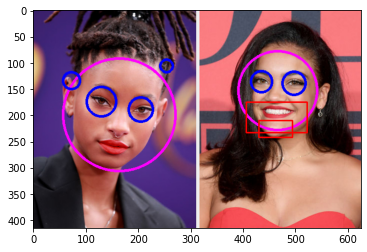

In [9]:
#-- 2. Read the image
img = cv.imread('/content/img.jpg')
detectFaceAndDisplay(img)

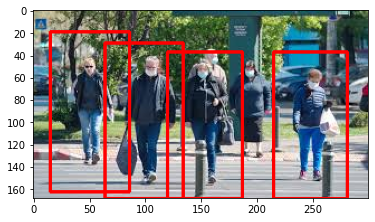

In [10]:
img2 = cv.imread('/content/img2.jpg')
detectPeopleAndDisplay(img2)

## Modelos pre-entrenados

Github: https://github.com/opencv/opencv/tree/master/data/haarcascades